# Isaiah Milkey
# Bonsai Classification Using CNN's


# 0. References:
- nb8_CNN.ipynb (Handwritten Digit Classification from Canvas)
- [Bonsai Tree Dataset](https://www.kaggle.com/datasets/vincenzors8/bonsai-styles-images/data)
- [Converting Images to Listable Data](https://kapernikov.com/tutorial-image-classification-with-scikit-learn/)
- [Helpful Video Visualizing what CNN's do](https://youtu.be/pj9-rr1wDhM?feature=shared)
- [Defining layers/ Layer Patterns](https://pyimagesearch.com/2021/05/14/convolutional-neural-networks-cnns-and-layer-types/)

# 1. Abstract:
My original CNN was based off of 'nb8_CNN.ipynb' from the course Canvas, and performed pretty poorly.

<img src="model_V1.png" width="30%" />

Through trial and error, as well as using online references, the notebook was iterated over to achieve a validation accuracy of: 0.75 and training accuracy of 0.9931.
I started by making changes using different optimizers like: SGD, RMSProp, and Adam. I stuck with Adam, as it performed best compared to the others. Other considerations were taken into account like adding Batch normalization, and single/multiple dropout layers. Increasing the number of convolutional layers also increased accuracy of the model, and 3 layers were decided for the final model.

<img src = "model_VFINAL.png" width="30%" />


# 2. Introduction: 
When trying to decide what data I wanted to do my final project on, I spent alot of time sifting through University websites and Githubs waiting for something to grab my attention. After a long (and stressful) time, I decided what better way to end my arduous year than with a relaxing dataset! 

In my second project for the class, I did a similar premice with wafers- and using CNN's to make a classification model for defects in the image. However, the images I was classifying were very simple, only being about 12x12. This projects expands on multi-class labelling by providing a much more complicated dataset, with more complicated classes and higher visual fidelity (224x224).

This notebook explores the iterations I made, as well as my thought process going into them when searching for the best model configuration.

# 3. Methods:
My data comes from [Kaggle](https://www.kaggle.com/datasets/vincenzors8/bonsai-styles-images/data), and was sourced by scraping images from google. In the dataset are 2700 split into 9 classes representing bonsai variations. 
The data comes separated by folder, so I had to create a dictionary that combined the data with the label. I followed a method similarly found in [here](https://kapernikov.com/tutorial-image-classification-with-scikit-learn/) that grabs the label or image from the directory to add it to the dictionary. Using PyTorch, then each tensor was created with the actual class number(0-8) and image data (224x224,RGB img). During training, I had problems overfitting, most likely due to the low training input, therefore I added randomization to the images such as random horizontal flip, zoom, and color jitter to vary my dataset more.

Then, the data was ran on a CNN, with 3 convolutional layers, and that had dropout after the first layer, and batch normalization after each layer.

# 4. Results and Discussion:
In summary, the models final statistics are: 

Training accuracy: 0.9931

Validation accuracy:  0.75

The best optimizer for this model was Adam, with lr=0.001 and weight_decay=1e-3.
Throughout most of my training, the model was overfitting- so I considered many ways to combat that (eg: dropout, adjusted learning rate, data augmentation).
The model did much better with a single dropout after the first convolutional layer, rather than adding dropouts after every layer. I beleive adding too many dropout layers of (0.5/0.25) was leading to way too much loss of data to train on. 
Adding normalization also sped up the trainig process, and made the model more accurate. 

<img src = "model_VFINAL.png" width="40%" />
<img src = "confusion_matrix.png" width="40%" />



# 5. Conclusions:
What I take away from this project, is that there is still alot to explore with training CNN's. I understand now more than ever that the quality of the data itself is very important to training. In order to have a good model- you must have good data, or else the patterns it will try to recognize will also be sloppy because the data itself is not consistent. When working with quality datasets like handwritten digits, or cats/dog classification, the CNN's seem simple because they usually work almost right outside of the box. The only reason these CNN's work so well is because of the quality, and large amount of data.

With this project, I have gained a better understanding of what each layer does in a CNN, and the math behind it as well. Throughout this project, I had to understand what each layer was doing so I could try to understand where overfitting was taking place.

In the future, I would like to explore further optimizing this model. On the dataset, another user commented having 0.98 validation accuracy, which is very impressive!

Future prospects would include creating a better system for detecting overfitting, and augmenting the data so that there is more training data.

# 6. Code Appendix:
All code used for this project can be found, and ran below:

In [55]:
#Get dataset from Kaggle
import kagglehub
path = kagglehub.dataset_download("vincenzors8/bonsai-styles-images")
print("Path to dataset files:", path)

#Other Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plts
from sklearn.model_selection import train_test_split

path += "\Bonsai_styles"
os.listdir(path)

data = dict()
data['label'] = []
data['image'] = []

for label in os.listdir(path):
    label_path = os.path.join(path, label)
    if os.path.isdir(label_path):
        for image_file in os.listdir(label_path):
            data['label'].append(label)
            data['image'].append(os.path.join(label_path, image_file))

#Print size of dataset
print("Number of images: ", len(data['image']))
#Print WxH of images 
print("Image size: ", plts.imread(data['image'][0]).shape)

#Print labels
print("Labels: ", np.unique(data['label']))

from collections import Counter
label_counts = Counter(data['label'])
for label, count in label_counts.items():
    print(f"{label}: {count} images")

Path to dataset files: C:\Users\14805\.cache\kagglehub\datasets\vincenzors8\bonsai-styles-images\versions\2
Number of images:  2700
Image size:  (224, 224, 3)
Labels:  ['Bunjinji' 'Chokkan' 'Fukinagashi' 'Han Kengai' 'Hokidachi' 'Moyogi'
 'Seki-joju' 'Sokan' 'Yose-ue']
Bunjinji: 300 images
Chokkan: 300 images
Fukinagashi: 300 images
Han Kengai: 300 images
Hokidachi: 300 images
Moyogi: 300 images
Seki-joju: 300 images
Sokan: 300 images
Yose-ue: 300 images


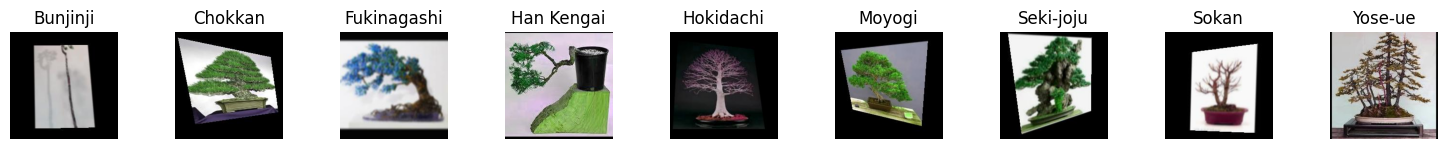

In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

labels = np.unique(data['label'])
fig, axes = plt.subplots(1, len(labels), figsize=(15, 4))
fig.tight_layout()

for ax, label in zip(axes, labels):
    # Find the first image that matches this label
    for img_path, lbl in zip(data['image'], data['label']):
        if lbl == label:
            image = mpimg.imread(img_path)
            ax.imshow(image)
            ax.axis('off')
            ax.set_title(label)
            break  # Stop after finding one image for this label
plt.show()

In [156]:
#Convert to Tensors

#Some PyTorch stuff:
import torch
from PIL import Image
import torchvision.transforms as transforms
from sklearn.preprocessing import LabelEncoder


X = data['image'] #List of image paths
y = data['label']

# 1. Define transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),  # Converts to [0, 1] and (C, H, W)
])

# 2. Encode string labels to integers
le = LabelEncoder()
encoded_labels = le.fit_transform(data['label'])  # e.g., 'Chokkan' → 2

# 3. Convert all images to tensors
image_tensors = []
label_tensors = []

for img_path, label in zip(data['image'], encoded_labels):
    try:
        img = Image.open(img_path).convert("RGB")
        img_tensor = transform(img)
        image_tensors.append(img_tensor)
        label_tensors.append(torch.tensor(label))
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

# 4. Stack into final tensor datasets
X = torch.stack(image_tensors)
y = torch.stack(label_tensors)

print("Image tensor shape:", X.shape)  # [N samples, 3(RGB), 224, 224]
print("Label tensor shape:", y.shape)  # [N samples]



Image tensor shape: torch.Size([2700, 3, 224, 224])
Label tensor shape: torch.Size([2700])


In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
print("Train size: ", len(X_train))
print("Test size: ", len(X_test))

Train size:  2160
Test size:  540


In [ ]:
from torch.utils.data import Dataset, TensorDataset, DataLoader
#For better performance
train_dataset = TensorDataset(X_train, y_train)
valid_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=100, shuffle=True)

In [76]:
next(iter(train_loader))

[tensor([[[[0.9608, 0.9608, 0.9608,  ..., 0.9255, 0.9255, 0.9255],
           [0.9608, 0.9608, 0.9608,  ..., 0.9255, 0.9255, 0.9255],
           [0.9569, 0.9569, 0.9569,  ..., 0.9255, 0.9255, 0.9255],
           ...,
           [0.8196, 0.8275, 0.8275,  ..., 0.4627, 0.4667, 0.4667],
           [0.8431, 0.8196, 0.7961,  ..., 0.4627, 0.4667, 0.4667],
           [0.8431, 0.8196, 0.7961,  ..., 0.4627, 0.4667, 0.4667]],
 
          [[0.9412, 0.9412, 0.9412,  ..., 0.9059, 0.9059, 0.9098],
           [0.9412, 0.9412, 0.9412,  ..., 0.9059, 0.9059, 0.9098],
           [0.9373, 0.9373, 0.9373,  ..., 0.9059, 0.9059, 0.9098],
           ...,
           [0.7843, 0.7922, 0.7922,  ..., 0.4706, 0.4745, 0.4745],
           [0.8078, 0.7843, 0.7608,  ..., 0.4706, 0.4745, 0.4745],
           [0.8078, 0.7843, 0.7608,  ..., 0.4706, 0.4745, 0.4745]],
 
          [[0.9294, 0.9294, 0.9294,  ..., 0.8863, 0.8824, 0.8745],
           [0.9294, 0.9294, 0.9294,  ..., 0.8863, 0.8824, 0.8745],
           [0.9255, 0.92

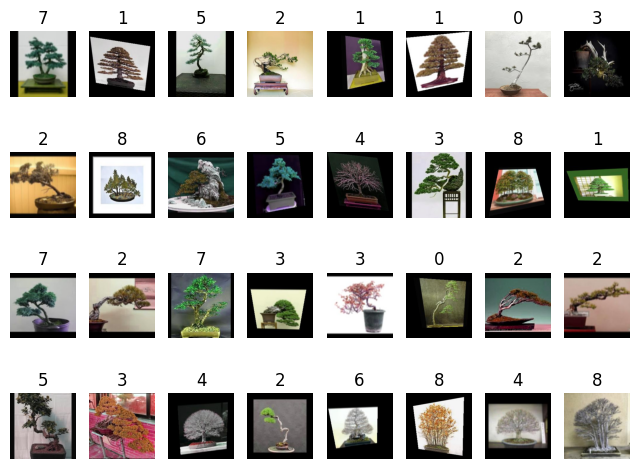

In [86]:
#Plot more examples
fig1, ax1 = plt.subplots(4, 8, figsize=(8,6))

#Flatten for easier indexing
ax1 = ax1.flatten()

#Get the next batch:
X_batch, y_batch = next(iter(train_loader))

#And plot:
for i in range(32):
    #Note the reshaping:
    ax1[i].imshow(X_batch[i].permute(1, 2, 0).numpy())
    ax1[i].set_title(y_batch[i].item())
    ax1[i].set_axis_off()

In [ ]:
#Import PyTorch
import torch
import torch.nn as nn
#2D Conv layer: 3 input channels, 16 output channels
conv1 = nn.Conv2d(3, 16, (5,5), stride=4) #5x5 filter

In [79]:
X_batch, y_batch = next(iter(train_loader))

out = conv1(X_batch)

In [80]:
out.shape

torch.Size([100, 16, 55, 55])

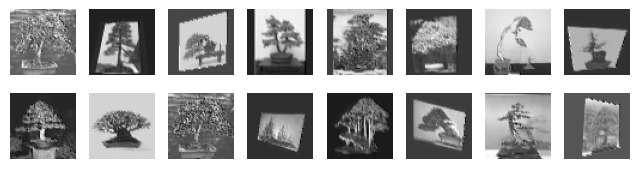

In [81]:
def show_conv(out):
    #Plot more examples
    fig1, ax1 = plt.subplots(2, 8, figsize=(8,2))

    #Flatten for easier indexing
    ax1 = ax1.flatten()

    #And plot:
    for i in range(16):
        ax1[i].imshow(out[i, 0].detach().numpy(), cmap='gray_r')
        ax1[i].set_axis_off()

show_conv(out)

In [128]:
model = CNN(num_classes=9)
dummy_input = torch.randn(1, 3, 224, 224)  # Batch size 1, 3 channels, 224x224 image
output = model(dummy_input)
print(output.shape)  # Should output [1, 9] for 9 classes

torch.Size([1, 9])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, num_classes=9):
        super(CNN, self).__init__()
        
        # Initial layer with larger filters
        self.conv1 = nn.Conv2d(3, 12, kernel_size=(5, 5), stride=4)
        self.bn1 = nn.BatchNorm2d(12)
        
        # Second convolution layer with increased number of filters
        self.conv2 = nn.Conv2d(12, 24, kernel_size=(3, 3))
        self.bn2 = nn.BatchNorm2d(24)
        
        # Third convolution layer with more filters
        self.conv3 = nn.Conv2d(24, 48, kernel_size=(3, 3))
        self.bn3 = nn.BatchNorm2d(48)
        
        # Max pooling and dropout layers
        self.pool = nn.MaxPool2d(kernel_size=(2, 2))
        self.dropout1 = nn.Dropout(0.25)
        
        # Fully connected layers
        self.fc1 = nn.Linear(48 * 5 * 5, 80)  # Adjusted input size based on feature map size
        self.fc2 = nn.Linear(80, num_classes)
    
    def forward(self, x):
        # First convolutional layer
        x = self.conv1(x)
        x = F.relu(x)
        x = self.bn1(x)
        x = self.pool(x)
        x = self.dropout1(x)
        
        # Second convolutional layer
        x = self.conv2(x)
        x = F.relu(x)
        x = self.bn2(x)
        x = self.pool(x)
        
        # Third convolutional layer
        x = self.conv3(x)
        x = F.relu(x)
        x = self.bn3(x)
        x = self.pool(x)
        
        # Flatten and fully connected layers
        x = x.view(x.size(0), -1)  # Flatten the feature map
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        
        return x

In [141]:
def training_loop_minibatch(data_loader, model, optimizer, loss_function):
    model.train()
    
    total_loss = 0.
    total_correct = 0
    total = 0

    #Iterate over batches
    for batch in data_loader:
        #Unpack batch
        X, y = batch

        #Reshape
        X = X.view(-1, 3, 224, 224)

        #Get prediction
        pred = model(X)
        
        #Get loss
        loss = loss_function(pred, y)

        #Back prop
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        #Get accuracy
        y_hat = pred.argmax(dim=1)

        total_correct += (y_hat == y).sum()
        total += len(y)

        #Track loss
        total_loss += loss.item() 

    #Calculate accuracy
    acc = total_correct / total

    #return loss for this batch
    return total_loss, acc

In [ ]:
#Run the model

#Loss Function
loss_function = nn.CrossEntropyLoss()

#Classification model
model = CNN()

#Optimizer <maybe try and compare multiple?>
#optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, weight_decay=0.0001)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)


#Run for some num of epochs
loss_list = []
acc_list = []

valid_loss_list = []
valid_acc_list = []

epochs = 20
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    l, acc = training_loop_minibatch(train_loader, model, optimizer, loss_function)
    loss_list.append(l)
    acc_list.append(acc)

    #Validation
    X, y = next(iter(valid_loader))
    with torch.no_grad():
        X = X.view(-1, 3, 224, 224)
        pred = model(X)

    #Loss
    valid_loss = loss_function(pred, y)
    valid_loss_list.append(valid_loss.item())

    #Argmax prediction
    y_hat = pred.argmax(dim=1)
    valid_acc = (y_hat == y).sum() / len(y)
    valid_acc_list.append(valid_acc.item())   


Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


Train accuracy:  tensor(0.9931)
Validation accuracy:  0.75


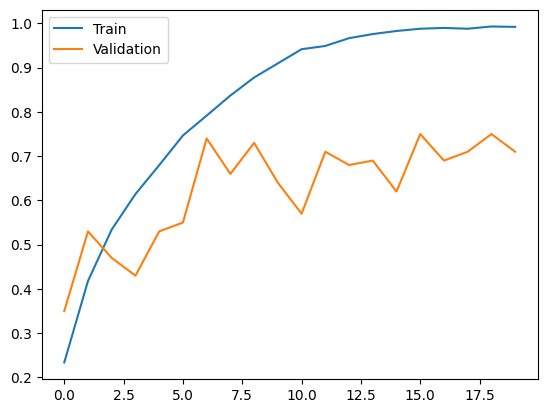

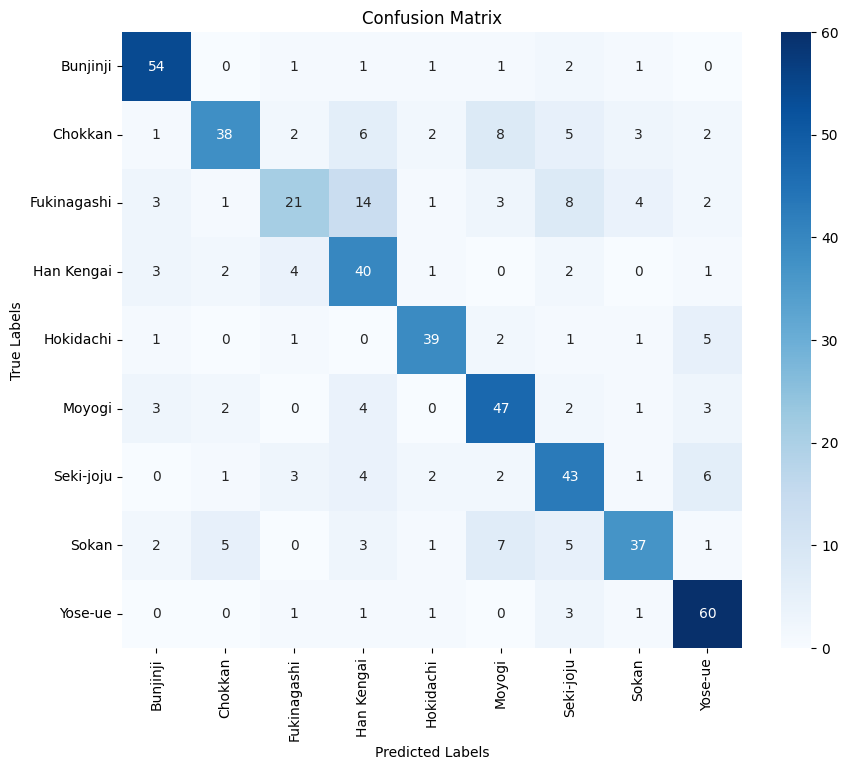

In [ ]:
plt.plot(acc_list)
plt.plot(valid_acc_list)
plt.legend(['Train', 'Validation'])

#Print largest accuracy
print("Train accuracy: ", max(acc_list))
print("Validation accuracy: ", max(valid_acc_list))

#Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to calculate and display the confusion matrix
def plot_confusion_matrix(model, data_loader, class_names):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X, y in data_loader:
            X = X.view(-1, 3, 224, 224)  # Reshape input if necessary
            preds = model(X)
            preds = preds.argmax(dim=1)  # Get the predicted class
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    # Generate confusion matrix
    cm = confusion_matrix(all_labels, all_preds, labels=range(len(class_names)))

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

# Example usage
class_names = le.classes_  # Get the original class names from the label encoder
plot_confusion_matrix(model, valid_loader, class_names)



